# Quantum Phase Estimation

* Learn about Quantum Phase Estimation and how it is built out of a QFT
* Implement the QPE onto real hardware

These exercises are based on a mild concatenation of https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html and https://qiskit.org/textbook/ch-demos/piday-code.html

Quantum phase estimation is one of the most important subroutines in quantum computation. It serves as a central building block for many quantum algorithms, including Shor's algorithm, HHL for solving linear systems, and simulating particle collisions. The objective of the algorithm is the following:

Given a unitary operator $U$ and its eigenvector $|\psi\rangle$ with eigenvalue $e^{\boldsymbol{2\pi i}\theta}$ prepared in a register, the algorithm estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$.  For simple $U$ from which we can derive $|\psi\rangle$, this might not seem very useful, but for complicated $U$ where $|\psi\rangle$ is hard to determine, this can be an amazing ability.

How is this amazing?

An important question for high energy theories is "what is the energy of a bound state of quarks and gluons?"  As you might recall, this corresponds to find the energy eigenvalue of specific states of the Hamiltonian.  This is classically a hard problem to solve efficiently.  So how in practice do we use QPE to get this value?  A standard method would be to use the Hamiltonian to evolve the qubits in the $|\psi\rangle$ register with a state preparation algorithm into the desired quantum state.  Such state preparation algorithms can be done despite the user not knowing how to prepare the state themself.  Once you have that state, one need only apply the QPE to that state to learn the energy of the previously unknown state.

The general quantum circuit for phase estimation is shown below. The top register contains $t$ 'counting' qubits, and the bottom contains qubits in the state $|\psi\rangle$:

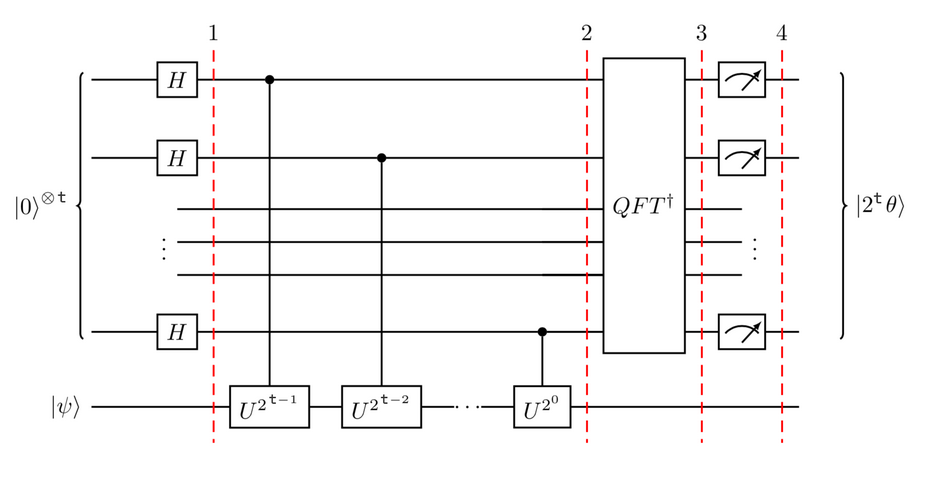

## Intuition <a id='intuition'></a>
The quantum phase estimation (QPE) algorithm uses phase kickback (When a gate acting on a state returns the same state, but with a different phase) to write the phase of $U$ (in the Fourier basis) to the $t$ qubits in the counting register. We use $U_{QFT}^{\dagger}$ to translate this from the Fourier basis into the computational basis, which we can then measure.

Hopefully, you recall that in the Fourier basis, the topmost qubit completes one full rotation when counting between $0$ and $2^t$. To count to a number, $x$ between $0$ and $2^t$, we rotate this qubit by $\tfrac{x}{2^t}$ around the z-axis. For the next qubit we rotate by $\tfrac{2x}{2^t}$, then $\tfrac{4x}{2^t}$ for the third qubit.

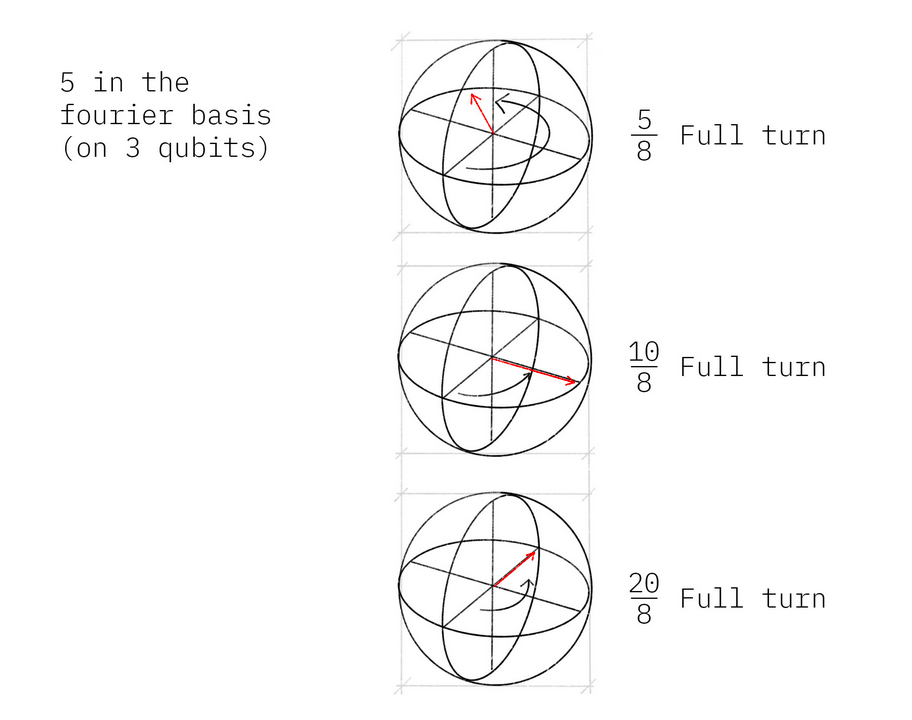

The first goal of QPE is to take the phase of $U$, and put it into the counting registers as a number between 0 and $2^t$ in the Fourier basis. Then we simply use $QFT^\dagger$ to convert this into the computational basis.  

For example, we would like to take a unitary that has an eigenvalue $U|\psi\rangle=e^{2\pi\theta i}|\psi\rangle$. By repeatedly performing controlled versions of U, we can encode the value of the phase in the counting register as the Fourier transform of a binary number $2^t\theta$ i.e. the counting register will be $|\tilde{2}^t\tilde{\theta}\rangle$. The final step is then to use the inverse QFT to put the counting registers into the state $|2^t\theta\rangle$.  By performing a measurement on this state, we discover the eigenvalue of the state $|\psi\rangle$


## The Math Behind the Curtain

As mentioned above, this circuit estimates the phase of a unitary operator $U$. It estimates $\theta$ in $U\vert\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$, where $|\psi\rangle$ is an eigenvector and $e^{\boldsymbol{2\pi i}\theta}$ is the corresponding eigenvalue.

i. **Setup**: $\vert\psi\rangle$ is in one set of qubit registers storing the quantum state whose eigenvalue we would like to learn. An additional set of $n$ qubits form the counting register on which we will store the value $2^n\theta$: 



$$ \psi_0 = \lvert 0 \rangle^{\otimes n} \lvert \psi \rangle$$

 

ii. **Superposition**: Apply a $n$-bit Hadamard gate operation $H^{\otimes n}$ on the counting register: 



$$ \psi_1 = {\frac {1}{2^{\frac {n}{2}}}}\left(|0\rangle +|1\rangle \right)^{\otimes n} \lvert \psi \rangle$$



iii. **Controlled Unitary Operations**: We need to introduce the controlled unitary $C-U$ that applies the unitary operator $U$ on the target register only if its corresponding control bit is $|1\rangle$. Since $U$ is a unitary operator with eigenvector $|\psi\rangle$ such that $U|\psi \rangle =e^{\boldsymbol{2\pi i} \theta }|\psi \rangle$, this means: 



$$U^{2^{j}}|\psi \rangle =U^{2^{j}-1}U|\psi \rangle =U^{2^{j}-1}e^{2\pi i\theta }|\psi \rangle =\cdots =e^{2\pi i2^{j}\theta }|\psi \rangle$$



Applying all the $n$ controlled operations $C − U^{2^j}$ with $0\leq j\leq n-1$, and using the relation $|0\rangle \otimes |\psi \rangle +|1\rangle \otimes e^{2\pi i\theta }|\psi \rangle =\left(|0\rangle +e^{2\pi i\theta }|1\rangle \right)\otimes |\psi \rangle$:

\begin{aligned}
\psi_{2} & =\frac {1}{2^{\frac {n}{2}}} \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{n-1}}}|1\rangle \right) \otimes \cdots \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{1}}}\vert1\rangle \right) \otimes \left(|0\rangle+{e^{\boldsymbol{2\pi i} \theta 2^{0}}}\vert1\rangle \right) \otimes |\psi\rangle\\\\
& = \frac{1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes \vert\psi\rangle
\end{aligned}
where $k$ denotes the integer representation of n-bit binary numbers. 

iv. **Inverse Fourier Transform**: Notice that the above expression is exactly the result of applying a quantum Fourier transform i.e.

$$
QFT\vert x \rangle = \frac{1}{2^\frac{n}{2}}
\left(\vert0\rangle + e^{\frac{2\pi i}{2}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^2}x} \vert1\rangle\right) 
\otimes  
\ldots
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^{n-1}}x} \vert1\rangle\right) 
\otimes
\left(\vert0\rangle + e^{\frac{2\pi i}{2^n}x} \vert1\rangle\right) 
$$

Replacing $x$ by $2^n\theta$ in the above expression gives exactly the expression derived in step 2 above. Therefore, to recover the state $\vert2^n\theta\rangle$, apply an inverse Fourier transform on the auxiliary register. Doing so, we find

$$
\vert\psi_3\rangle = \frac {1}{2^{\frac {n}{2}}}\sum _{k=0}^{2^{n}-1}e^{\boldsymbol{2\pi i} \theta k}|k\rangle \otimes | \psi \rangle \xrightarrow{\mathcal{QFT}_n^{-1}} \frac {1}{2^n}\sum _{x=0}^{2^{n}-1}\sum _{k=0}^{2^{n}-1} e^{-\frac{2\pi i k}{2^n}(x - 2^n \theta)} |x\rangle \otimes |\psi\rangle
$$ 

v. **Measurement**: 
The above expression peaks near $x = 2^n\theta$. For the case when $2^n\theta$ is an integer, measuring in the computational basis gives the phase in the auxiliary register with high probability: 



$$ |\psi_4\rangle = | 2^n \theta \rangle \otimes | \psi \rangle$$



For the case when $2^n\theta$ is not an integer, it can be shown that the above expression still peaks near $x = 2^n\theta$ with probability better than $4/\pi^2 \approx 40\%$.

## Coding QPE for the T-gate

Let’s take a gate we have passing familar with, the $T$-gate, and use Quantum Phase Estimation to estimate its phase. $T$-gate adds a phase of $e^\frac{i\pi}{4}$ to the state $|1\rangle$:

$$ T|1\rangle = 
\begin{bmatrix}
1 & 0\\
0 & e^\frac{i\pi}{4}\\ 
\end{bmatrix}
\begin{bmatrix}
0\\
1\\ 
\end{bmatrix}
= e^\frac{i\pi}{4}|1\rangle $$

Since QPE will give us $\theta$ where:



$$ T|1\rangle = e^{2i\pi\theta}|1\rangle $$



We expect to find:



$$\theta = \frac{1}{8}$$



In this example we will use three qubits in the counting register and obtain an _exact_ result (not an estimate!) because 8 is a power of 2.

Step 1: Preparing the environment

You will need import the generic libraries
* *matplotlib.pyplot*, I usually do this as *plt*
* *numpy*, I usually do this as *np*
* *math*

From *qiskit*, you will need to import
* IBMQ, Aer, transpile, assemble, QuantumCircuit, ClassicalRegister, QuantumRegister

From *qiskit.providers.ibmq* you will need to import
* least_busy

From *qiskit.tools.monitor* you will want to import *job_monitor*

From *qiskit.visualization* you will want to import *plot_histogram*

In [ ]:
#initialization

# importing Qiskit

# import basic plot tools


Now, set up the quantum circuit. We will use four qubits -- qubits 0 to 2 as counting qubits, and qubit 3 as $|\psi\rangle$, the eigenstate of $T$.  There are two eigenstates we could choose, $|0\rangle$ or $|1\rangle$. $|0\rangle$ has $\theta=0$ and isn't terribly interesting.  $|1\rangle$ has $\theta=\frac{1}{8}$ and is more interesting.  So let's **initialize $\vert\psi\rangle = \vert1\rangle$**

In [ ]:
#Prepare a quantum circuit called `qpe` with 4 qubits and 3 classical bits

#We want to prepare the final qubit, q3 which will be our |psi> into a |1> state

#Lets draw the circuit to check ourselves


Next, for **every counting register qubit**, we want to apply a **Hadamard** gate, and then draw our circuit to check.

Next we perform the controlled unitary operations, specifically we want controlled-phase gates C-P. **Remember:** Qiskit orders its qubits the opposite way round to the image above.

As discussed, we want to apply **C-P to q3 controlled on q0** , **C-P^2 to q3 controlled on q1**, **C-P^4 to q3 controlled on q2**.  One way to do this, which could be modified to counting registers of differing length is to employ a for loop.  One possible pseudocode might be:

    repetitions = 1
    FOR qubit from 0 to 2
        FOR gates from 0 to repetitions
            APPLY Controlled-P gate with pi/4 controlled on qubit to q3
        repetitions *= 2
        
 I forget if we have introduced the controlled phase gate in QISKIT, so lets do it now:
     
     circuit.cp(theta,control_qubit,target_qubit)

We apply the inverse quantum Fourier transformation to convert the state of the counting register. In the previous lab, you made a recursive verion of the QFT and performed a inverse operation onto it.  Here, lets code up directly the inverse QFT.

In [ ]:
#Lets define a function qft_dagger that takes in a circuit `qc` and the number of qubits `n`

    # We need a for loop over qubit from 0 to n/2 (remember to use the integer division //)
    
        #Inside this loop, we want to swap the qubits indexed at `qubit` and `n-qubit-1`
    
    # Now we need a for loop over and integer j in range(n)    
    
        #and within this, a for loop over m in the range(j)
        
            #Here we need a controlled-phase gate with theta=-math.pi/float(2**(j-m)), 
            #controlled by m and targetting j
            
        #Outside the m loop, but within the j loop, we need to add H gates to each qubit    
        

With this function defined we need to apply it to our circuit, and then measure all the counting registers.  In order to make sure this code is properly sequenced, we want to introduce the `circuit.barrier()` function.  This function ensures that the transpiler doesn't try to combine code across it.

For measuring, if we want to place the result of measuring `qubit` into `classical_bit` we use the syntax: 
    
    circuit.measure(qubit,classical_bit)

In [ ]:
#apply a barrier to your circuit qpe

# Apply inverse QFT for the circuit with n=3

#apply another barrier

# Make a for loop over the range(3) and measure each of the counting register qubits

#Last but not least, lets draw the circuit to compare to the cartoon above


Now we can finish up by running this with the **aer_simulator**.  

Try running for **2048 shots** and plotting a histogram.  Hopefully you remember all the steps:
* get backend
* transpile
* assemble
* run
* get counts
* plot histogram

If all has gone according to plan, you got `001` with 100% certainty, which translates to the decimal: `1`. We need to divide our result (`1`) by $2^n$ to get $\theta$:

How does your value compare to the expected value of 1/8?

In [ ]:
#Put you most likely result from running the code in the binary_answer variable as a string


#define a variable decimal version of your bit_sring by casting it to an int with int(binary_answer,2)


#Define a varible that is the total number of counting qubits

#Compute theta by dividing your decimal answer by 2^number of count qubits


#Print theta


## Getting More Precision 

The $T$-gate was special, because the exact answer could be reached with a specific number of qubits. Now, let's use a gate with $\theta = \frac{1}{3}$ which cannot be exactly represented in binary notation. We set up our circuit following your previous work, much of which can be copied down. <b>But be careful, copying code is an amazing way to introduce errors when difference in the code aren't appreciated</b>

<b> Importantly, don't name the circuit the same name.  Instead call it `qpe2` </b>

In [1]:
# Create and set up circuit with 4 qubits and 3 classical bits

# Apply H-Gates to counting qubits:

# Prepare our eigenstate |psi>=|1> on the last qubit:


# Do the controlled-U operations:
#First, we want to define a variable `angle` which we will store 2*theta that we want
#In this case, we want theta=pi/3

#Here we want to introduce the code that will perform controlled phase gates controlled by the
#counting registers.  For the angle argument of circuit.cp() we want to use `angle`

# Do the inverse QFT:

#Add a barrier

# Finish with a measurement of all the counting register qubits
    
#For sanity, better draw the circuit


Once you are happy with your qpe2 circuit, run another simulation with **aer_simulator**, but this time with **4096** shots.

In [ ]:
# Let's see the results!
aer_sim = Aer.get_backend('aer_simulator')
shots = 4096
t_qpe2 = transpile(qpe2, aer_sim)
qobj = assemble(t_qpe2, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

We are expecting the result $\theta = 0.3333\dots$, lets check.  If you have multiple, largish results, use the next cell on both.  In such cases, the two should be considered bounds on the right answer.  

In [3]:
#Put you most likely results from running the code in the binary_answer1 and binary_answer2 etc. variables as a string


#Convert your results to decimal


#Store the number of counting qubits in the register

#Compute theta1, theta2, etc

#Print thetas and compare to 1/3



I suspect you found **two** high probability results, `010(bin) = 2(dec)` and `011(bin) = 3(dec)`. These correspond to $\theta = 0.25$ **(off by 25%)** and $\theta = 0.375$ **(off by 13%)** respectively. The true value, though, does lies between the values we can get from our counting bits, and this gives us a measure of uncertainty and imprecision.

The failure to get a good precision is that our range of possible results is **finite**, and limited by how many qubits we put into our counting register.  Consider the the possible values of $\theta$ when we have **3,4, or 5 qubits** by running the next line of code and observing the possible choices.

In [4]:
for n in range(3,6):
    theta_array=np.zeros(2**n)
    for i in range(0,2**n):
        theta_array[i]=i/2**n
    print("n=",n,"\n options for theta: \n",theta_array)

Traceback (most recent call last):
  Input In [4] in <cell line: 1>
    theta_array=np.zeros(2**n)
NameError: name 'np' is not defined

Use %tb to get the full traceback.


Notice how as we add more qubits, we get a finer and finer resolution on the decimial values. 
To get more precision, therefore, we can add **more counting** qubits! For this example, let's add 2 more qubits.

To do this, you could just repeat the code from about, except with **6 qubits** and **5 bits**.

<b>Again though, don't name the circuit the same thing, call it `qpe3`</b>

In [ ]:
# Create and set up circuit

# Apply H-Gates to counting qubits:

# Prepare our eigenstate |psi>:

# Do the controlled-P operations:

# Do the inverse QFT:


# Measure of course!

#Draw if you are nervous

Time again to run a simulation with **aer_simulator** and plot a histogram

In [ ]:
# Let's see the results!


Take your two most common results, and put them into the cell below.  And compare to how you with the lower resolution results of before

In [ ]:
#Put you most likely results from running the code in the binary_answer1 and binary_string2 variables as a string
binary_answer1=
binary_answer2=

#This code converts your binary representation to a decimal representation
decimal_answer1=int(binary_answer1,2)
decimal_answer2=int(binary_answer2,2)

#Store the number of counting qubits in the register
number_of_counting_qubits=5

#Compute theta
theta1=decimal_answer1/2**number_of_counting_qubits
theta2=decimal_answer2/2**number_of_counting_qubits

#Print theta
print("Experimental Theta Bound: ", theta1)
print("Experimental Theta Bound: ", theta2)
print("Exact Theta: ", 1/3)


If everything went to plan, you should have found the new results differ from $\frac{1}{3}$ by about 5%.  <b>A much better result than about 20% errors of before!</b>

## What does it look like on a real devices <a id='real_devices'></a>

Let's start with trying to see how running on a machine effects `qpe` which is our $T$ gate example.  First, lets check that it is still properly stored:

In [ ]:
#Draw qpe.  Does it still agree with what you have above?
qpe.draw()

Now, lets get a real simulation going with the **least busy** machine that we can get.  To review, in order to do this:
* Load your IBMQ account
* get your provider and store it in *provider*
* get your backend by calling *least_busy* with all the conditions we used last week
* set the number of shots to **1024**
* transpile
* run with your backend
* call the *job_monitor* so you can observe things as they go

In [ ]:
nqubits=4
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='fermilab-1', project='qjs-for-hep')
backend = least_busy(provider.backends(filters=lambda x:  not x.name()== 'ibmq_santiago'
                                       and not x.name() == 'ibmq_bogota'
                                       and not x.name() == 'ibmq_casablanca'
                                       and x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("backend: ", backend)

shots = 1024
t_qpe = transpile(qpe, backend, optimization_level=3)
job = backend.run(t_qpe, shots=shots)
job_monitor(job)

Once your code is done, get the *results* of the job, use *get_counts*, and the plot a histogram of your data

In [ ]:
# get the results from the computation


We can hopefully see that the most likely result is `001` which is the result we would expect from the simulator. Unlike the simulator, there is a probability of measuring something other than `001`, this is due to noise and gate errors in the quantum computer.

Now, how about we be more try the more ambitious `qpe3`  Repeat the code in the previous couple of code cells, but with the `qpe3`.

In [ ]:
### Put the code for running qpe3 on a real machine here


In [ ]:
# get the results from the computation


How does your result for  `qpe3` from the real machine compare to the noiseless simulation?